In [1]:
import pandas as pd
df = pd.read_csv('train.tsv', sep='\t', index_col='train_id')
df.head()

,name,item_condition_id,category_name,brand_name,price,shipping,item_description
train_id,,,,,,,
0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


In [2]:
df['description_len'] = df['item_description'].str.len()
count_df = df.groupby(['category_name'])['category_name', 'price','description_len'].agg({
    'category_name': {
        'counts': 'count'
    },
    'price': {
        'price_mean': 'mean'
    },
    'description_len': {
        'description_mean': 'mean'
    }
})

count_df = count_df.reset_index()
print(len(count_df))
count_df.head()

1287


,category_name,counts,price_mean,description_mean
0,Beauty/Bath & Body/Bath,5049,18.481878,220.239255
1,Beauty/Bath & Body/Bathing Accessories,332,21.882530,115.987952
2,Beauty/Bath & Body/Cleansers,723,13.564315,172.177040
3,Beauty/Bath & Body/Other,147,20.469388,141.054422
4,Beauty/Bath & Body/Scrubs & Body Treatments,812,24.640394,245.445813


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.show()
sns.stripplot(y='counts', jitter=True, data=count_df)

36


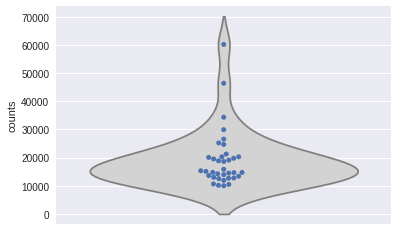

In [4]:
rules_columns = ['count_10k']
pre_aggregation_rules = lambda row: pd.Series([
   int(row['counts'] >= 10000)
])

count_df[rules_columns] = count_df.apply(pre_aggregation_rules, axis=1)
count_df = count_df[(count_df[rules_columns] == 1).all(axis=1)]
print(len(count_df))
sns.violinplot(y='counts', data=count_df, inner=None, color='lightgray')
sns.swarmplot(y='counts', data=count_df)

In [5]:
count_df.sort_values(by=['counts'], inplace=True, ascending=False)
count_df[['category_name', 'counts', 'price_mean', 'description_mean']]

,category_name,counts,price_mean,description_mean
1137,"Women/Athletic Apparel/Pants, Tights, Leggings",60177,34.392733,119.468618
1260,Women/Tops & Blouses/T-Shirts,46380,19.386125,106.991570
27,Beauty/Makeup/Face,34335,18.470890,162.659677
28,Beauty/Makeup/Lips,29910,18.520846,180.425825
112,Electronics/Video Games & Consoles/Games,26557,24.119667,106.399179
26,Beauty/Makeup/Eyes,25215,14.621931,202.034821
79,"Electronics/Cell Phones & Accessories/Cases, C...",24676,13.174360,222.032380
1265,Women/Underwear/Bras,21274,18.636364,153.820391
1261,"Women/Tops & Blouses/Tank, Cami",20284,14.411655,112.636709
1254,Women/Tops & Blouses/Blouse,20284,15.660102,114.427233


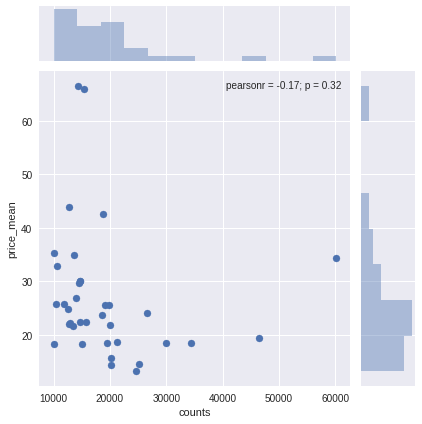

In [6]:
sns.jointplot('counts', 'price_mean', count_df)

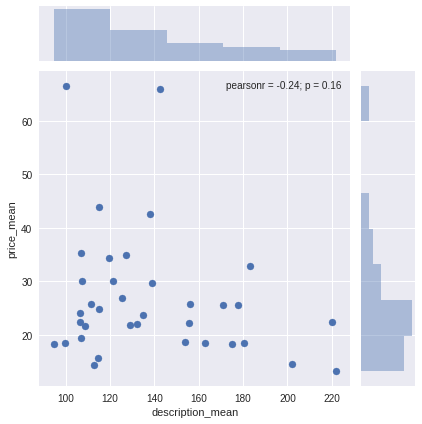

In [7]:
sns.jointplot('description_mean', 'price_mean', count_df)

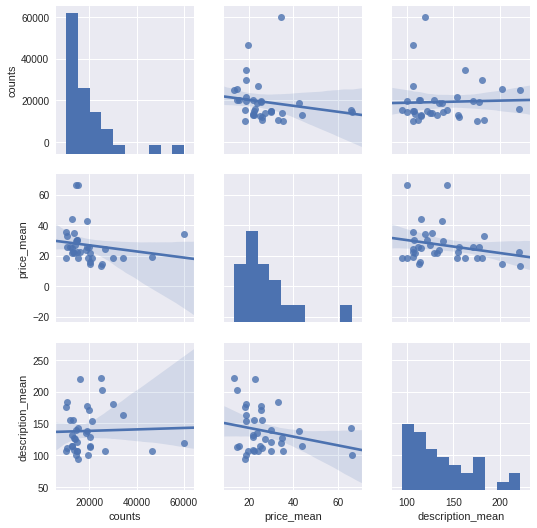

In [8]:
sns.pairplot(count_df[['counts', 'price_mean', 'description_mean']], kind='reg')

In [9]:
count_df.loc[112]

category_name       Electronics/Video Games & Consoles/Games
counts                                                 26557
price_mean                                           24.1197
description_mean                                     106.399
count_10k                                                  1
Name: 112, dtype: object

In [10]:
pre_aggregation_rules = lambda row: pd.Series([
   int(row['category_name'] == 'Electronics/Video Games & Consoles/Games')
])
df['category_name']=df['category_name'].fillna('NA')
selected_df = df[df['category_name'].str.match('Electronics/Video Games & Consoles/Games')]
selected_df.head()

,name,item_condition_id,category_name,brand_name,price,shipping,item_description,description_len
train_id,,,,,,,,
91,Goosebumps HorrorLand DS Game,3,Electronics/Video Games & Consoles/Games,Nintendo,10.0,0,Good used condition. Ask about bundling to save.,48.0
177,NBA 2k14 BRAND NEW SEALED,1,Electronics/Video Games & Consoles/Games,Sony,6.0,1,I am a first time seller located in California...,159.0
233,Rockstar Bundle (Xbox 360 / One),1,Electronics/Video Games & Consoles/Games,Xbox,38.0,1,Brand New! Factory Sealed! Fast & Free Shippin...,164.0
237,Lego Harry Potter Years 1-4 Wii,2,Electronics/Video Games & Consoles/Games,Nintendo,19.0,0,Lego Harry Potter Years 1-4 Wii E10+ Warner Br...,59.0
276,Nintendo 64,3,Electronics/Video Games & Consoles/Games,Nintendo,124.0,0,Here I have a Nintendo 64 old school Everythin...,276.0


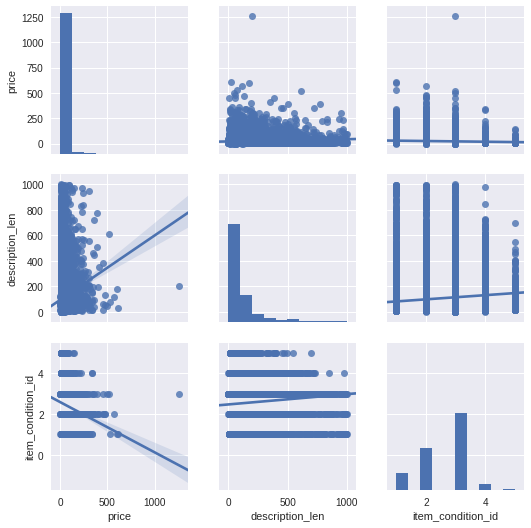

In [12]:
sns.pairplot(selected_df[['price', 'description_len', 'item_condition_id']], kind='reg')